# **Маркетинговый анализ приложения Procrastinate Pro+**

Комппания делает огромные вложения в рекламу, но в последние несколько месяцев терпит убытки.\
**Моя задача — разобраться в причинах и помочь компании выйти в плюс.**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Мне предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Загрузим данные
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал визитов
    pd.read_csv('/datasets/orders_info_short.csv'),  # журнал заказов
    pd.read_csv('/datasets/costs_info_short.csv')  # журнал расходов
)

In [3]:
# 10 рандомных строк "визиты"
visits.sample(5)

,User Id,Region,Device,Channel,Session Start,Session End
9061,846874491992,United States,iPhone,TipTop,2019-05-11 22:21:00,2019-05-11 22:46:10
268874,71837008257,UK,Android,LeapBob,2019-08-26 20:30:00,2019-08-26 21:14:03
218316,983060816350,UK,PC,organic,2019-05-23 06:20:33,2019-05-23 06:20:42
192796,604667184218,United States,Mac,FaceBoom,2019-10-19 23:59:30,2019-10-20 00:19:05
76831,878697858191,United States,iPhone,organic,2019-07-15 21:27:40,2019-07-15 22:22:59


In [4]:
# Общая информация "визиты"
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


**Кол-во строк 309901\
Пропусков данных нет\
Необходимо преобразовать столбец Session Start и Session End к типу даты pandas\
Исправьте стиль в заголовках столбцов**

In [5]:
# 10 рандомных строк "заказы"
orders.sample(5)

,User Id,Event Dt,Revenue
4161,339294553683,2019-06-20 18:45:09,4.99
7904,83199375617,2019-07-15 08:22:48,4.99
10095,857627606566,2019-07-30 17:03:54,4.99
2743,959720866230,2019-06-07 11:04:19,4.99
32385,347880209355,2019-08-05 14:16:14,4.99


In [6]:
# Общая информация "заказы"
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


**Кол-во строк 40212\
Пропусков данных нет\
Необходимо преобразовать столбец Event Dt к типу даты pandas\
Исправьте стиль в заголовках столбцов**

In [7]:
# 10 рандомных строк "расходы"
costs.sample(5)

,dt,Channel,costs
1175,2019-08-04,LeapBob,12.39
801,2019-07-21,YRabbit,2.70
822,2019-08-11,YRabbit,3.99
291,2019-08-20,MediaTornado,4.32
1158,2019-07-18,LeapBob,7.56


In [8]:
# Общая информация "расходы"
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Кол-во строк 1800\
Пропусков данных нет\
Необходимо преобразовать столбец dt к типу даты pandas\
Исправьте стиль в заголовках столбцов**

**Предобработка данных**

In [9]:
# Переименуем названия столбцов "визиты"
visits = visits.rename(columns={'User Id':'user_id', 
                        'Region':'region', 
                        'Device':'device', 
                        'Channel':'channel',
                        'Session Start':'session_start',
                         'Session End':'session_end'})

# Преобразуем столбец session_start и session_end к типу даты pandas
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_start'])

# Проверяем
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [10]:
# Переименуем названия столбцов "заказы"
orders = orders.rename(columns={'User Id':'user_id', 
                        'Event Dt':'event_dt',
                        'Revenue':'revenue'})

# Преобразуем столбец event_dtn к типу даты pandas
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# Проверяем
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [11]:
# Переименуем названия столбцов "расходы"
costs = costs.rename(columns={'Channel':'channel'})

# Преобразуем столбец dt к типу
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
# Добавим столбцы с номерами месяца и недели
#costs['month'] = costs['dt'].dt.month
#costs['week'] = costs['dt'].dt.isocalendar().week

# Проверяем
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проверяем на дубликаты

In [12]:
visits.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
costs.duplicated().sum()

0

**Выводы по предобработке данных:**
- Привели названия столбцов к правильному написанию
- Преобразовали данные к типу даты
- Проверили на наличие дубликатов - отсутствуют

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [15]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

       # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [16]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей за весь период'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей за весь период'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей за весь период'.format(horizon))

    plt.tight_layout()
    plt.show()

In [22]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей за весь период'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей за весь период'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [23]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [24]:
# Определим минимальную и максимальную даты привлечения пользователей
print('Минимальная дата привечения пользователя ', profiles['dt'].min(),
     'Максимальная дата привечения пользователя ', profiles['dt'].max(), sep="\n")

Минимальная дата привечения пользователя 
2019-05-01
Максимальная дата привечения пользователя 
2019-10-27


In [25]:
# Присвоим переменные для дальнейшего использования
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

In [26]:
# Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
# Таблицу, отражающая количество пользователей и долю платящих из каждой страны.
print(
    profiles.pivot_table(index='region', values=['payer', 'user_id'], 
                         aggfunc={'payer': 'mean', 'user_id': 'count'}).
    sort_values(by = 'payer', ascending = False)
)

                  payer  user_id
region                          
United States  0.069019   100002
Germany        0.041119    14981
UK             0.039829    17575
France         0.037994    17450


- Больше всего платящих пользователей пришло из United States - 100002 (6,9%)

In [27]:
# Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
# Таблицу, отражающая количество пользователей и долю платящих для каждого устройства.
print(
    profiles.pivot_table(index='device', values=['payer', 'user_id'], 
                         aggfunc={'payer': 'mean', 'user_id': 'count'}).
    sort_values(by = 'payer', ascending = False)
)

            payer  user_id
device                    
Mac      0.063644    30042
iPhone   0.062079    54479
Android  0.058518    35032
PC       0.050468    30455


- Большинство платящих пользователей используют Mac (6,3%) и iPhone (6,2%)

In [28]:
# Каналы, из которых пришло больше всего платящих пользователей. 
# Таблицу, отражающая количество пользователей и долю платящих для каждого канала привлечения.
print(
    profiles.pivot_table(index='channel', values=['payer', 'user_id'], 
                         aggfunc={'payer': 'mean', 'user_id': 'count'}).
    sort_values(by = 'payer', ascending = False)
)

                       payer  user_id
channel                              
FaceBoom            0.122049    29144
AdNonSense          0.113402     3880
lambdaMediaAds      0.104700     2149
TipTop              0.096007    19561
RocketSuperAds      0.079137     4448
WahooNetBanner      0.052964     8553
YRabbit             0.038265     4312
MediaTornado        0.035747     4364
LeapBob             0.030633     8553
OppleCreativeMedia  0.027077     8605
organic             0.020553    56439


- Больше всего платящих пользователей пришло из рекламных каналов: FaceBoom, AdNonSense, lambdaMediaAds, TipTop

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [29]:
# Посчитаем общую сумму расходов на маркетинг
print(profiles['acquisition_cost'].sum().round(2))

105497.3


In [30]:
# Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

profiles.pivot_table(index='channel', values='acquisition_cost', 
    aggfunc='sum').sort_values(by = 'acquisition_cost', ascending = False)


,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


- Общая сумма расходов на маркетинг 105497.3
- Больше всего расходов на следющие каналы: TipTop и FaceBoom	

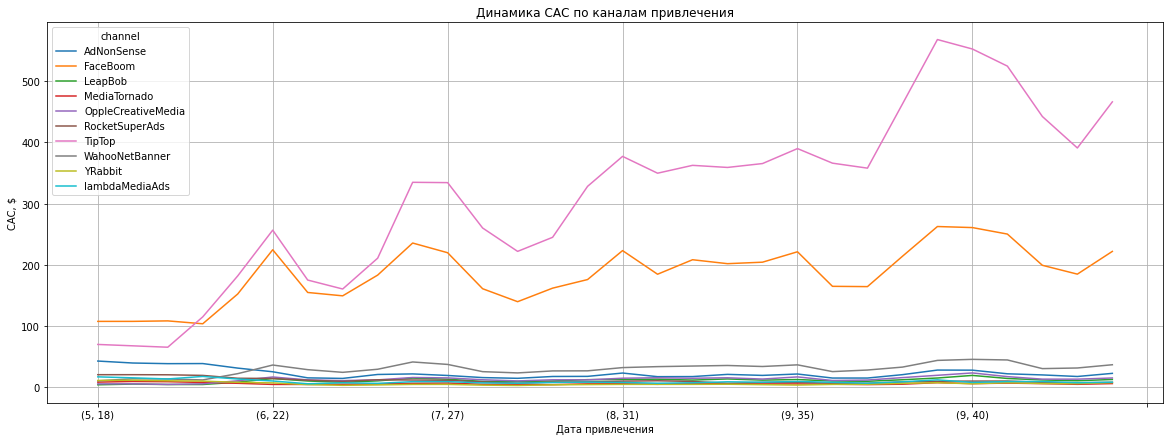

In [55]:
# визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

costs.pivot_table(index=['month', 'week'], columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(20, 7))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

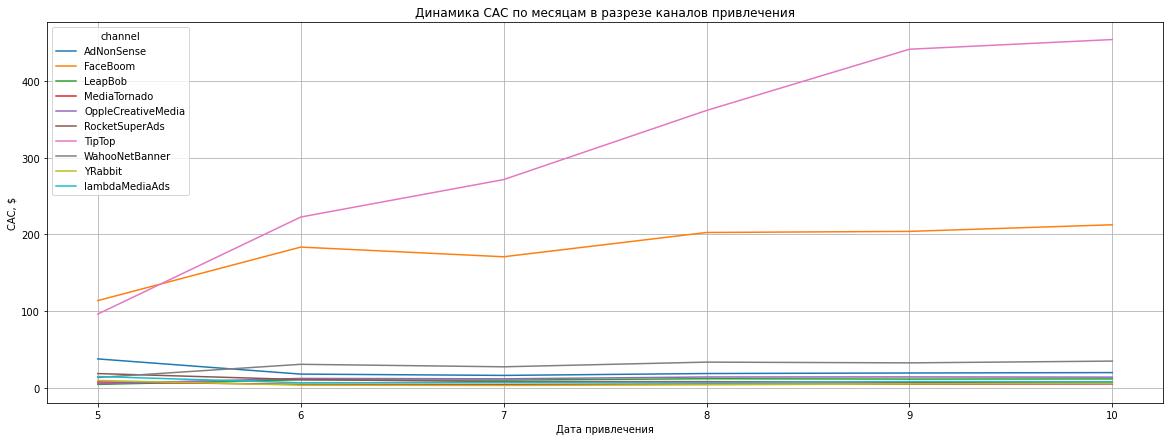

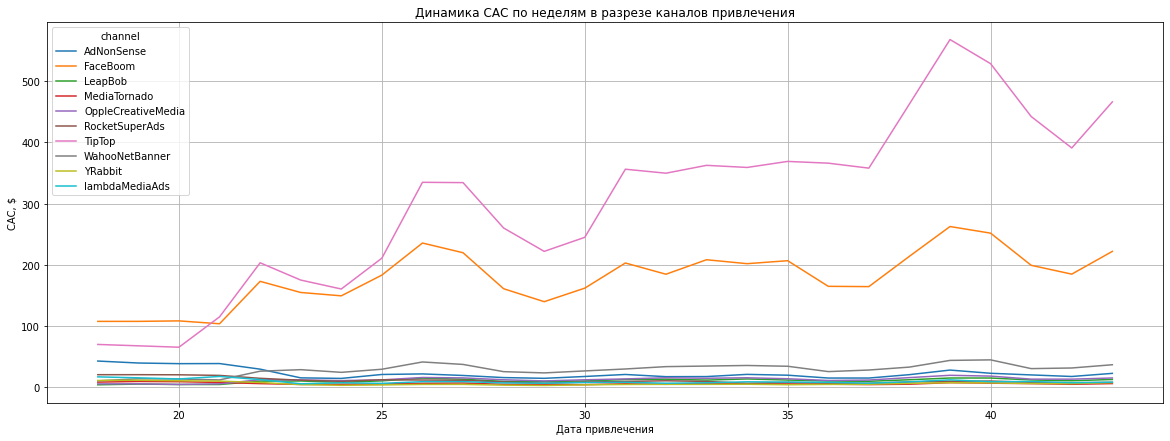

In [56]:
# визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

ax =costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(20, 7))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по месяцам в разрезе каналов привлечения'
         )
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(20, 7))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по неделям в разрезе каналов привлечения'
         )
plt.show()

- В большинстве каналов равномерно распределены расходы.
- Выделяются 2 канала продвижения TipTop и FaceBoom - затраты растут на всем временном промежутке

In [33]:
# Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
cac = (
profiles.query('channel != "organic"').groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'}).
    sort_values(by = 'cac', ascending = False).
    round(2)
    
)
cac

,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


- Самые дорогие пользователи пришли с рекламных источников: TipTop, FaceBoom, AdNonSense

In [34]:
# Средняя стоимость привлечения 1 пользователя без учета канала organic
profiles.query('channel != "organic"')['acquisition_cost'].mean().round(2)

1.13

In [35]:
# Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) в разрезе устройств.
cac = (
profiles.groupby('device')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'}).
    sort_values(by = 'cac', ascending = False).
    round(2)
    
)
cac

,cac
device,
Mac,0.80
iPhone,0.80
Android,0.64
PC,0.50


- Самые дорогие пользователи используют Mac и IPhone, самые дешевые PC

In [36]:
# Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) в разрезе стран.
cac = (
profiles.groupby('region')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'}).
    sort_values(by = 'cac', ascending = False).
    round(2)
    
)
cac

,cac
region,
United States,0.91
Germany,0.30
France,0.29
UK,0.29


- Пользователи в USA в 3 раза дороже, чем в остальных регионах.

**Общий вывод раздела "Маркетинг"**
- Общая сумма расходов на маркетинг 105497.3
- Больше половины расходов пришлось на 2 канала TipTop и FaceBoom
- Расходы по каналам TipTop и FaceBoom росли с течением времени
- Самое дорогое привлечение пользователей с канала TipTop. На каналах FaceBoom, AdNonSense стоимость привлечения пользователей близко к среднему.
- Самые дорогие пользователи устройств Mac и IPhone и в регионе USA



**Рекомендации отделу маркетинга**
- Снизить сумму расходов на каналы TipTop и FaceBoom, в регионе USA и пользователей Mac и IPhone
- Обратить внимание на пользователей PC, самый низкий показатель CAC

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [37]:
# Уберём пользователей канала organic
profiles = profiles.query('channel != "organic"')

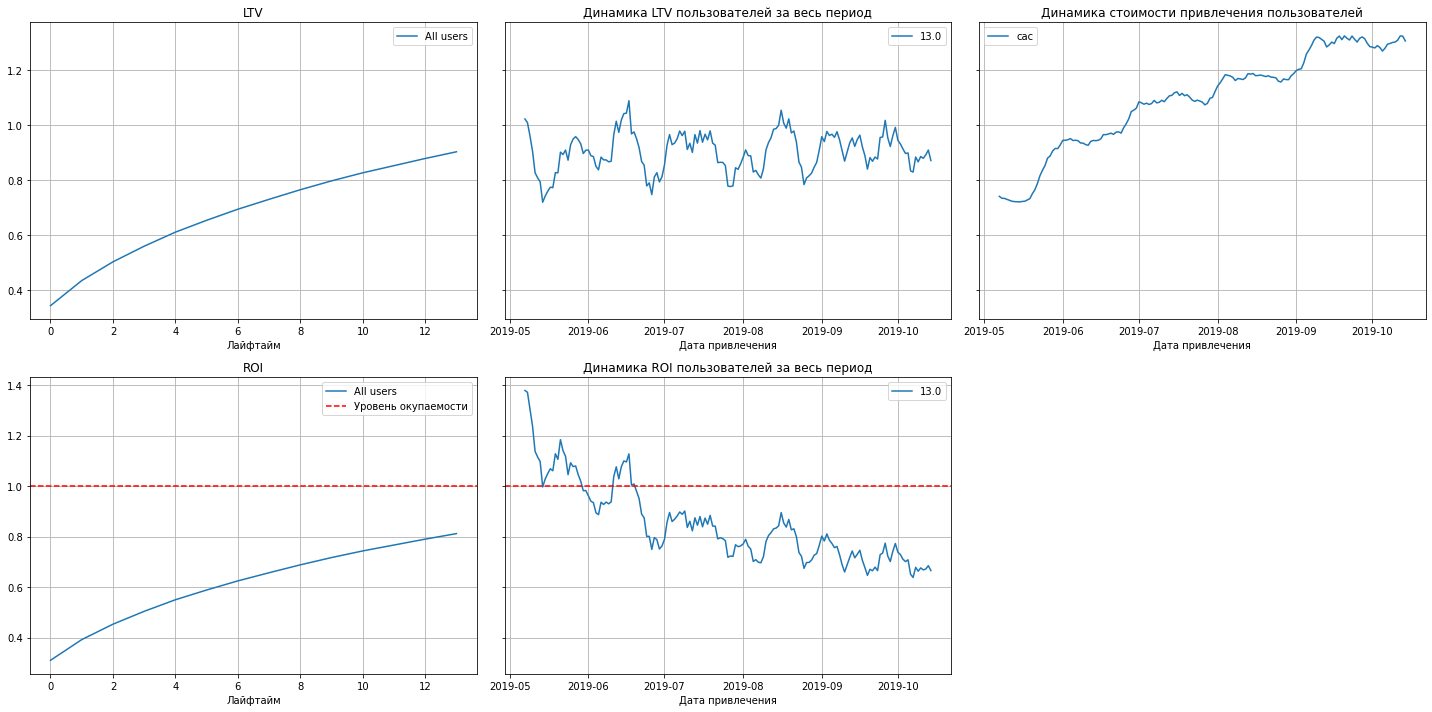

In [38]:
# Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
# Cчитаем LTV и ROI
horizon_days = 14
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# Cтроим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


**По графикам можно сделать такие выводы:**
- LTV сохраняется примерно одном уровне, без резких изменений.
- CAC растет на протяжении всего периода.
- Реклама перестала окупаться с июня.

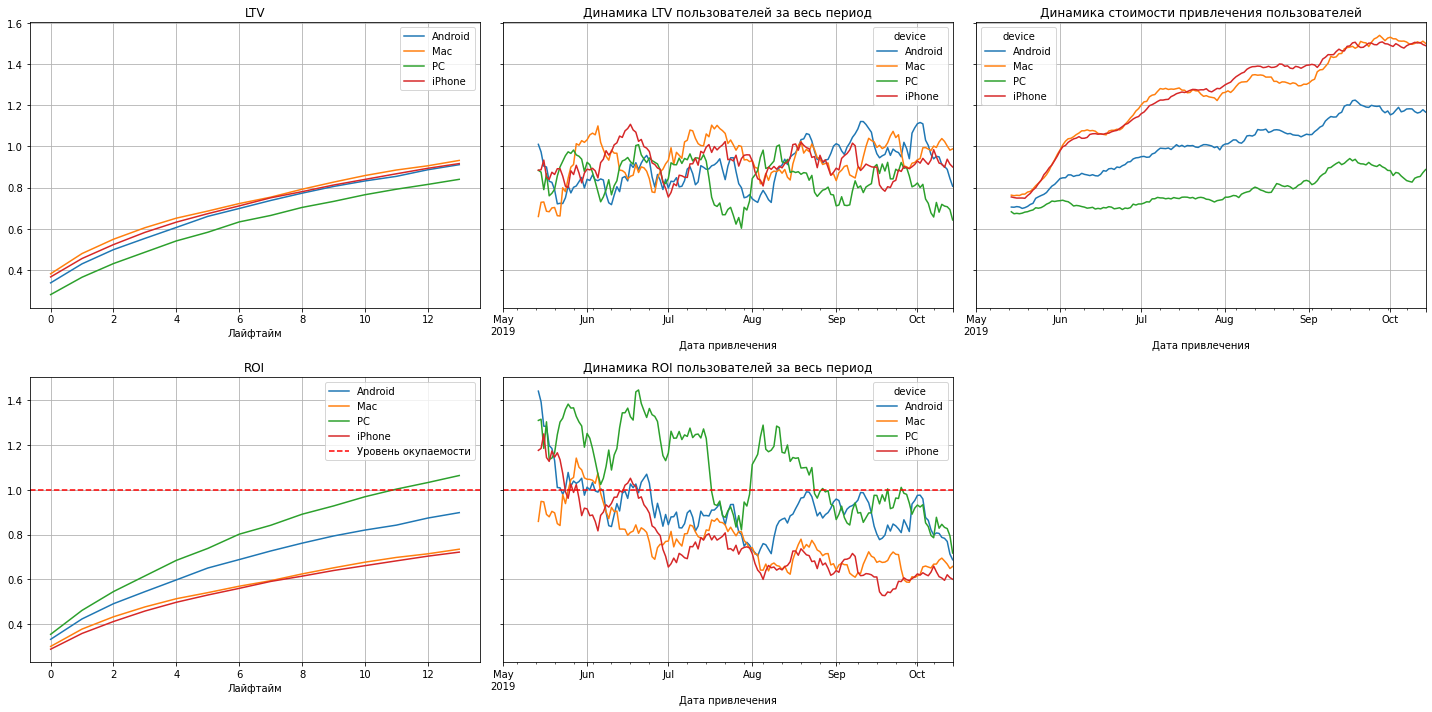

In [39]:
# Проанализируем окупаемость рекламы с разбивкой по устройствам
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**По графикам можно сделать такие выводы:**
- LTV сохраняется примерно одном уровне, без резких изменений.
- CAC растет на протяжении всего периода, более высокий показатель у пользователей MAC и IPhone
- Реклама не окупается для MAC, IPhone и Android.
- У пользователей PC реклама окупилась

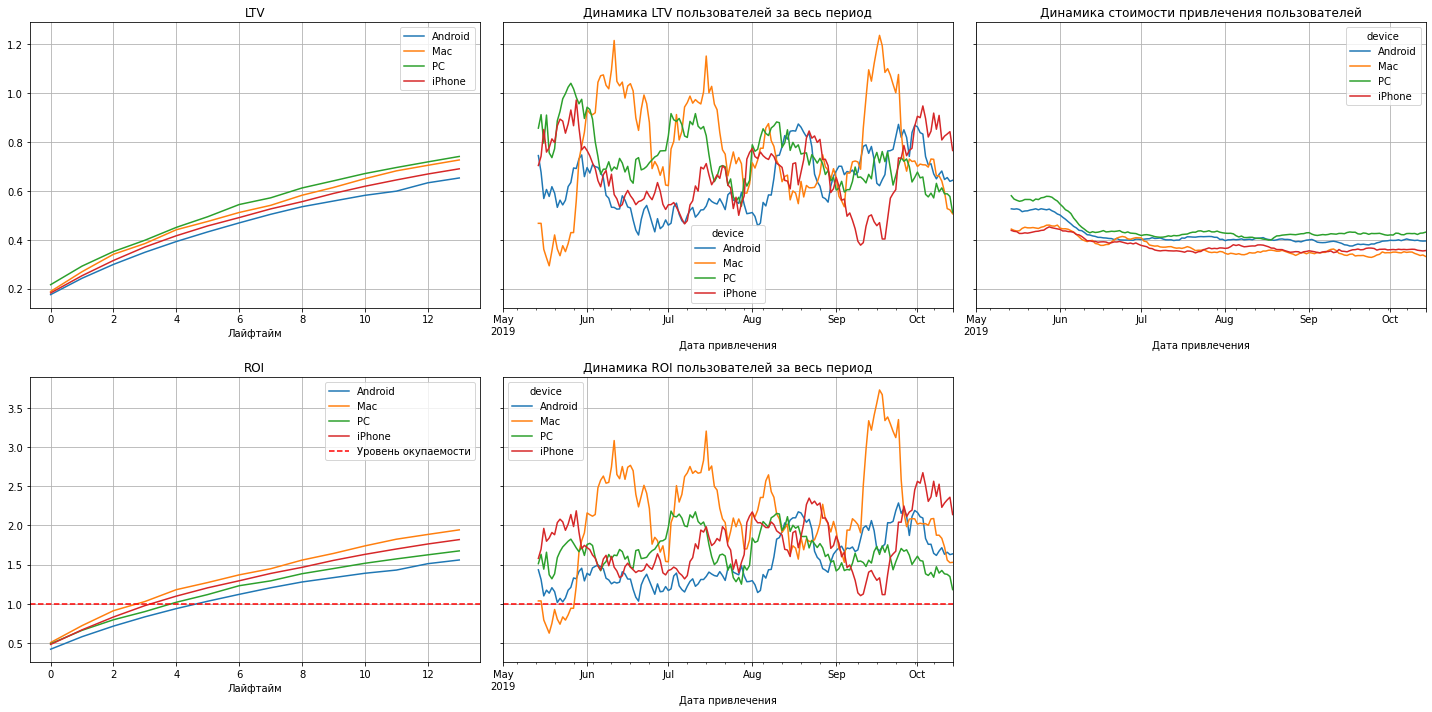

In [40]:
# Проанализируем окупаемость рекламы с разбивкой по устройствам исключив самые дорогие каналы TipTop и FaceBoom
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel not in ["TipTop", "FaceBoom"]'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**По графикам можно сделать такие выводы:**
- Исключив самые дорогие каналы привлечения TipTop и FaceBoom видим, что реклама окупилась для всех устройств.


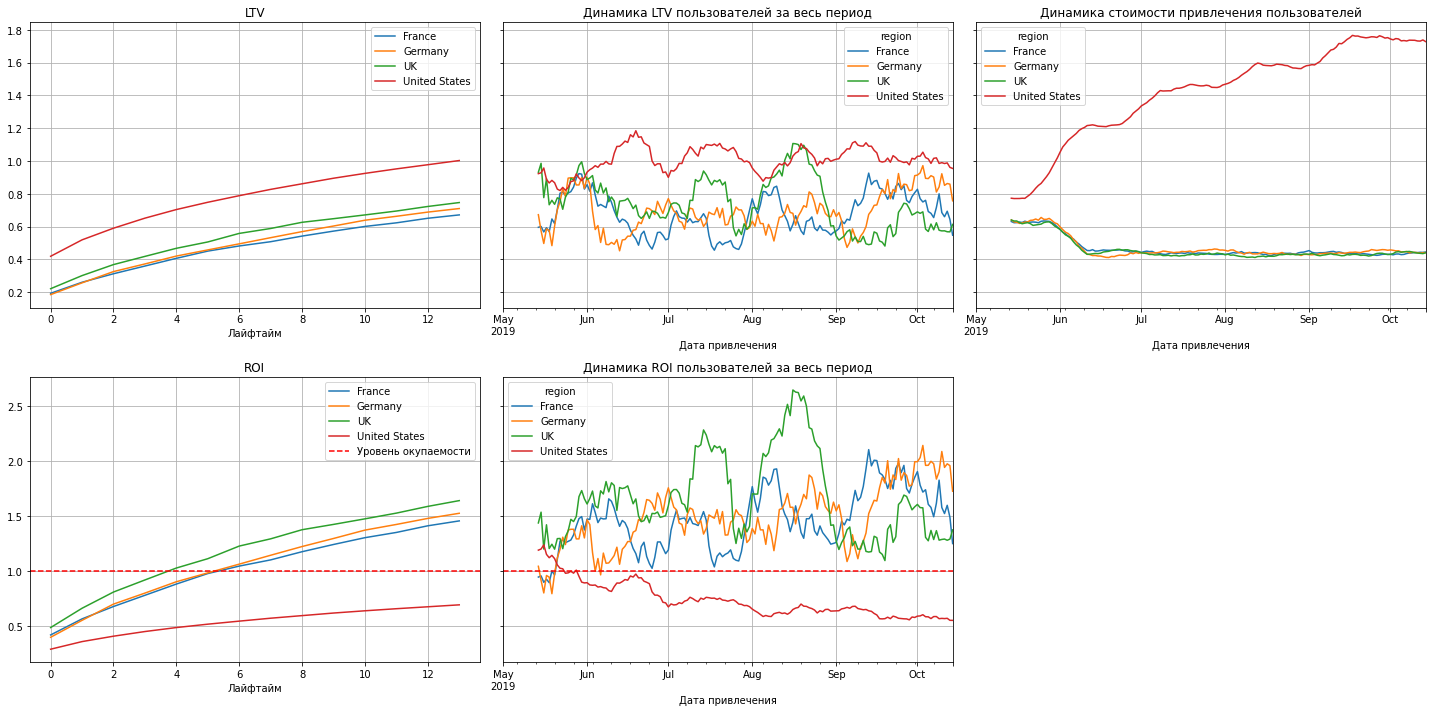

In [41]:
# Проанализируем окупаемость рекламы с разбивкой по странам
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**По графикам можно сделать такие выводы:**
- LTV сохраняется примерно одном уровне, без резких изменений, выделяется LTV USA, здесь самый высокий показатель.
- CAC для USA резко растет в июне и продолжает рост с течением времени. Остальные страны имеют стабильный показатель, без изменений.
- Реклама не окупается для USA, остальные страны выше уровня окупаемости на всем временном промежутке.



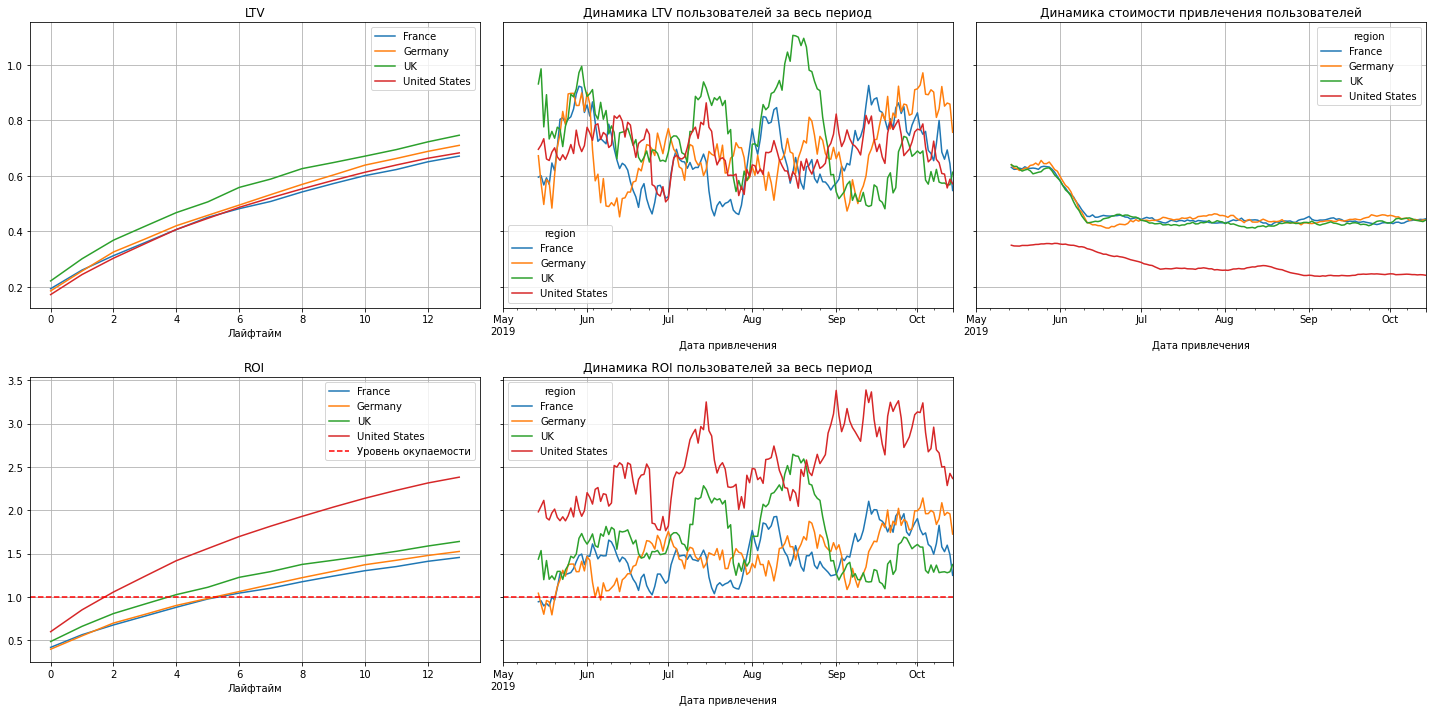

In [42]:
# Проанализируем окупаемость рекламы с разбивкой по странам исключив самые дорогие каналы TipTop и FaceBoom
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel not in ["TipTop", "FaceBoom"]'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**По графикам можно сделать такие выводы:**
- Исключив самые дорогие каналы привлечения TipTop и FaceBoom видим, что реклама окупилась во всех регионах.

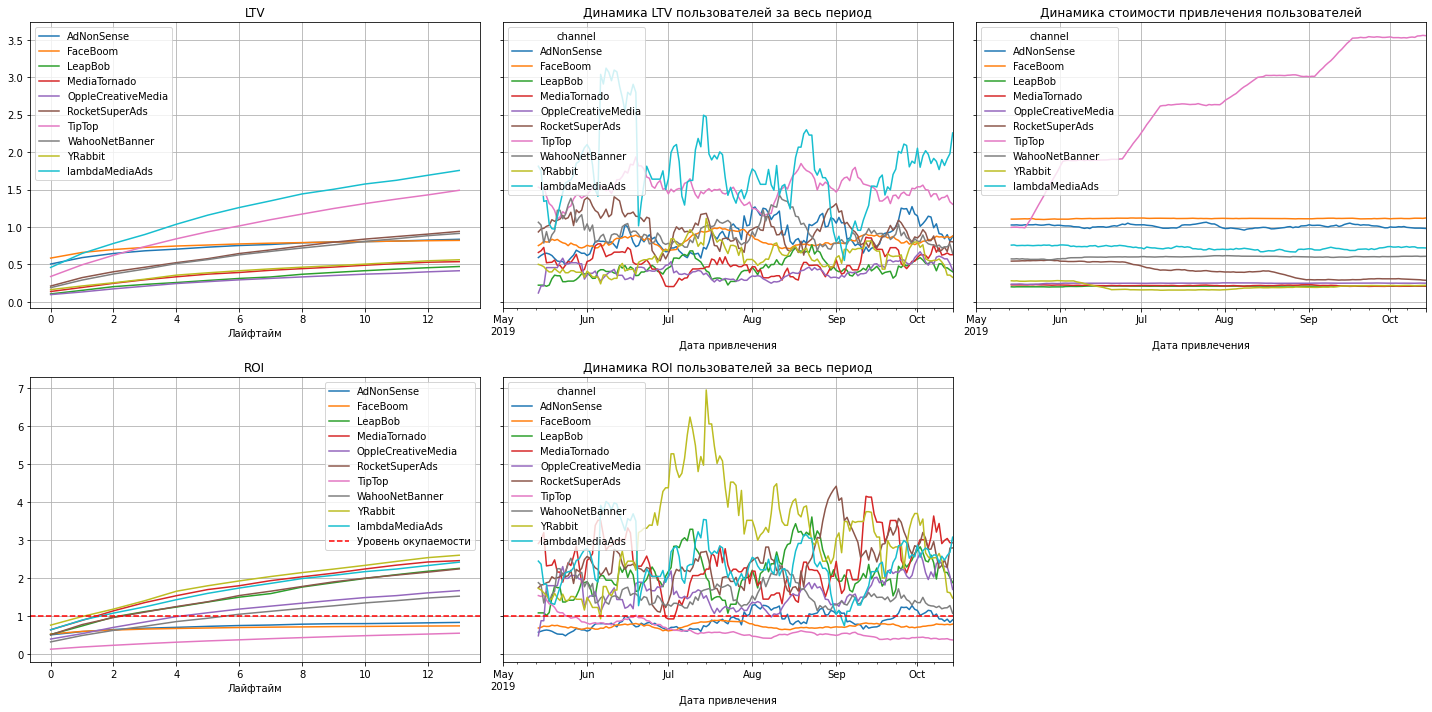

In [43]:
# Проанализируем окупаемость рекламы с разбивкой по рекламным каналам
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**По графикам можно сделать такие выводы:**
- Cамый высокий показатель LTV у каналов Tip Top и lambdaMediaAds
- CAC резко растет для канала Tip Top с течением времени. Остальные каналы имеют стабильный показатель, без изменений.
- Реклама не окупается для для каналов Tip Top, FaceBoom, AdNonSense
- Каналы Tip Top и FaceBoom не окупились на всем временном промежутке.
- Самый высокий уровень окупаемости показывет канал YRabbit, особенно в июле. А также каналы MediaTornado, lambdaMediaAds



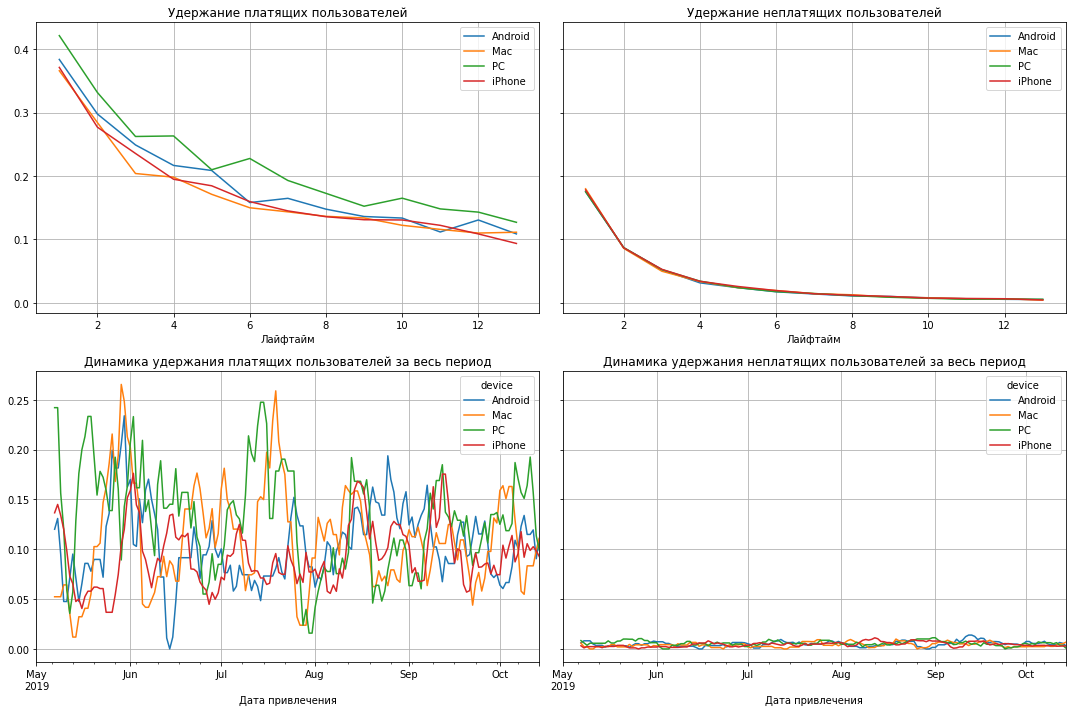

In [44]:
# Проверим конверсию и удержание пользователей, а также динамику изменений по устройствам 
# Построим графики конверсии и удержания

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- В мае и июле можно выделить пользоваетелей ПК и Mac, их динамика выше других, и показывает максимальные значения.

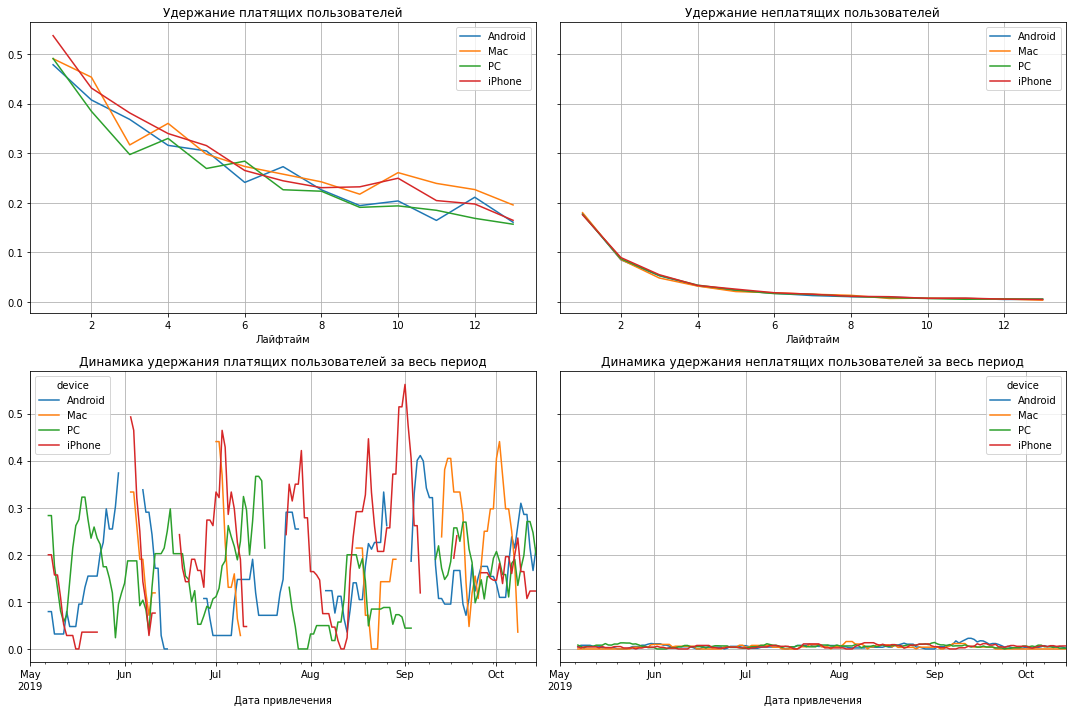

In [45]:
# Проверим конверсию и удержание пользователей, а также динамику изменений по устройствам 
# исключив самые дорогие каналы TipTop и FaceBoom
# Построим графики конверсии и удержания

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel not in ["TipTop", "FaceBoom"]'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Исключив самые дорогие каналы привлечения TipTop и FaceBoom видим высокие показатели динамики удержания в летний период у пользователей IPhone 


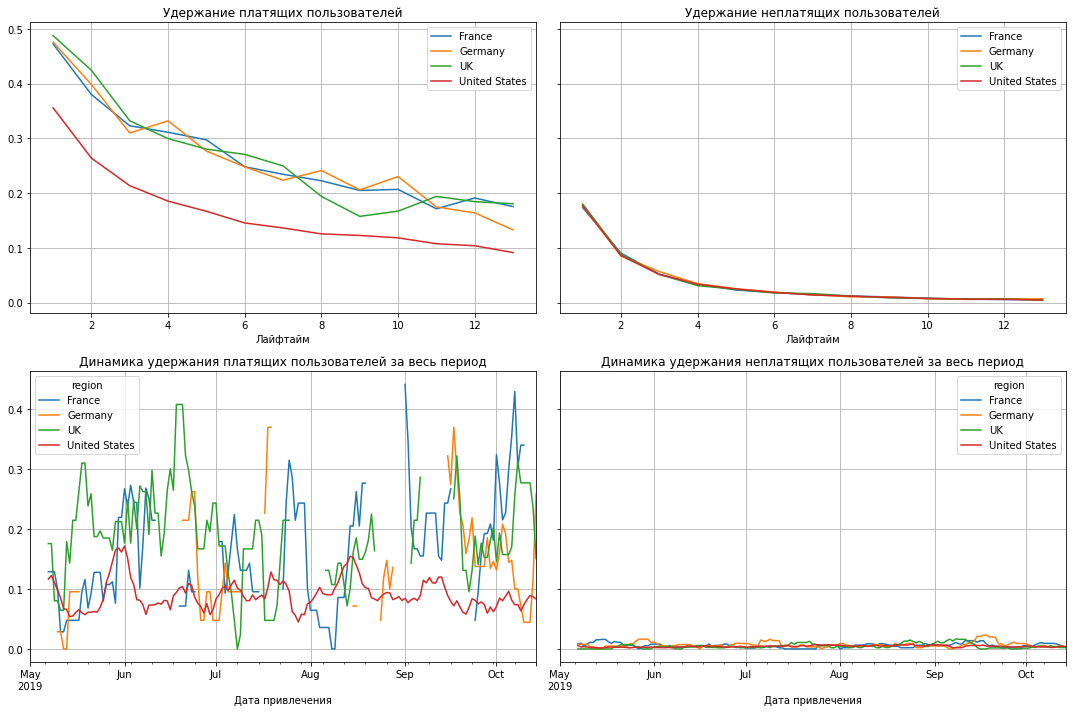

In [46]:
# Проверим конверсию и удержание пользователей, а также динамику изменений по странам 
# Построим графики конверсии и удержания

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Динамика удержания платящих пользователей из USA заметно ниже других регионов
- Такие же показатели на всем исследуемом периоде



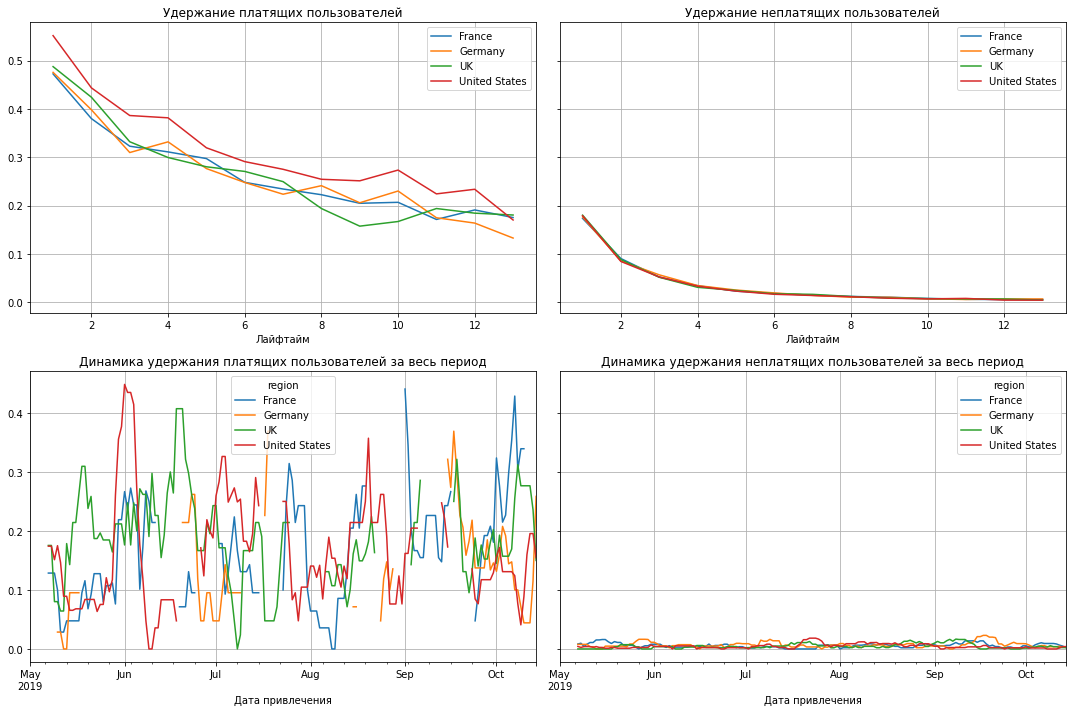

In [47]:
# Проверим конверсию и удержание пользователей, а также динамику изменений по странам 
# исключив самые дорогие каналы TipTop и FaceBoom
# Построим графики конверсии и удержания

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel not in ["TipTop", "FaceBoom"]'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Исключив самые дорогие каналы привлечения TipTop и FaceBoom, картина координально меняется. Теперь пользователи из USA имеют самый высокий покалатель удержания платящих пользователей.


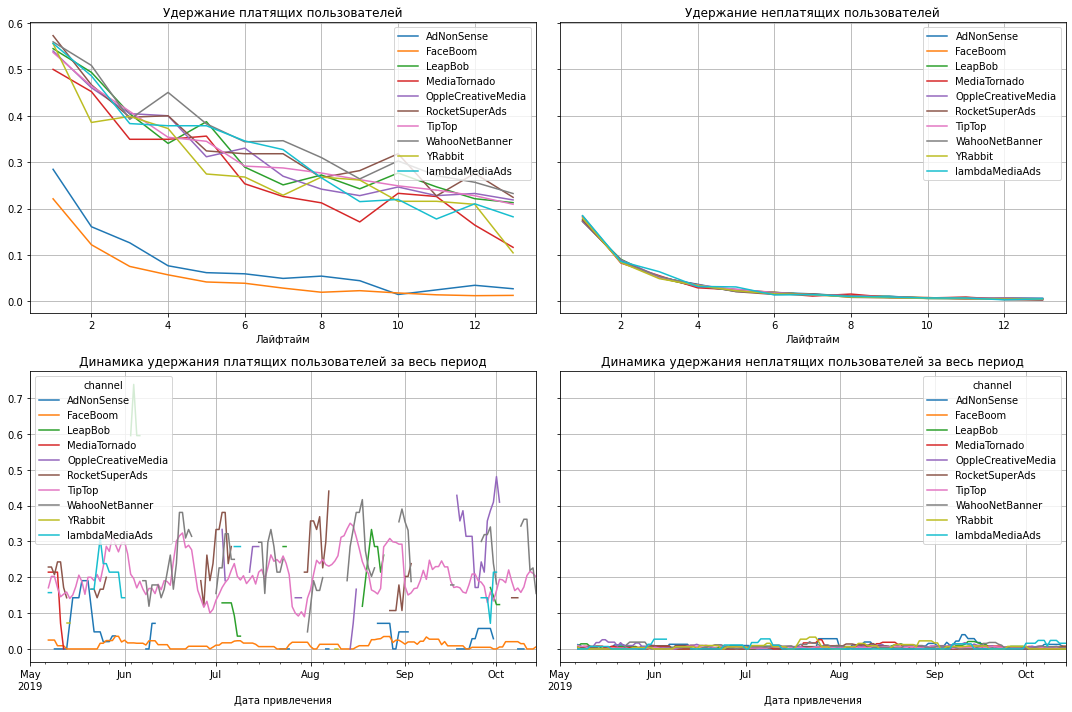

In [48]:
# Проверим конверсию и удержание пользователей, а также динамику изменений по рекламным каналам
# Построим графики конверсии и удержания

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Динамика удержания платящих пользователей каналов FaceBoom и AdNonSense почти в 3 раза меньше чем у остальных каналов
- За 6 месяцев канал FaceBoom показывает самый низкий показатель удержания платящих пользователей
- В начале июня можно выделить канал LeapBob, у него очень высокий показатель за все время из всех каналов


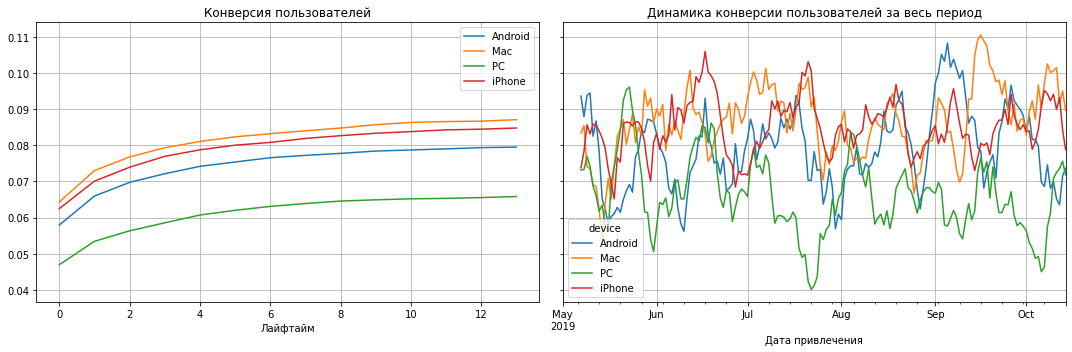

In [49]:
# Построим и изучим графики конверсии и удержания с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Конверсия пользователей ПК самая низкая
- Такая же динамика сохраняется на всем периоде.

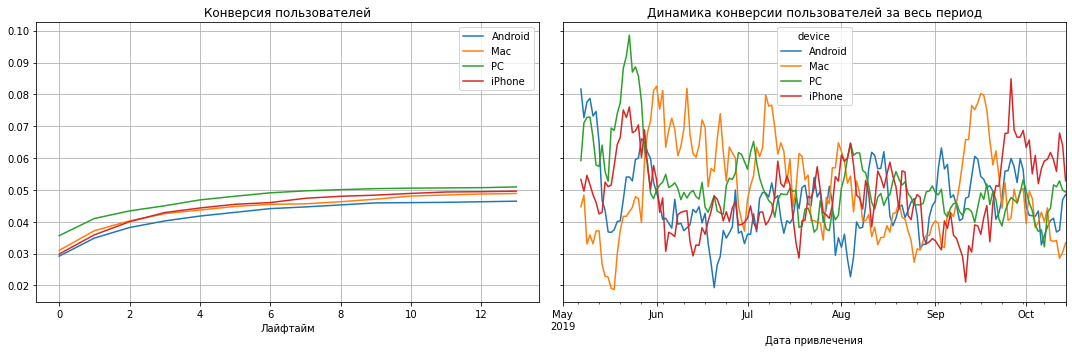

In [50]:
# Построим и изучим графики конверсии и удержания с разбивкой по устройствам
# исключив самые дорогие каналы TipTop и FaceBoom
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel not in ["TipTop", "FaceBoom"]'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Исключив самые дорогие каналы привлечения TipTop и FaceBoom в лидеры по конверсии вышли пользователи PC.


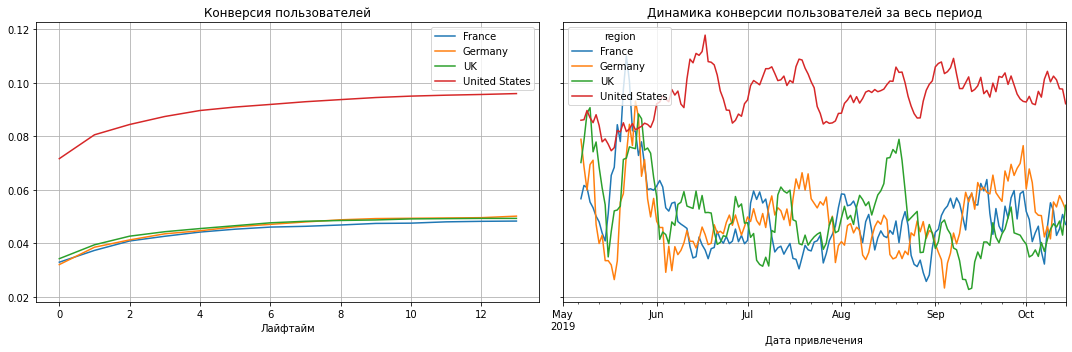

In [51]:
# Построим и изучим графики конверсии и удержания с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Конверсия пользователей из USA заметно превышает показатели других регионов
- Такая же динамика сохраняется на на всем временном промежутке


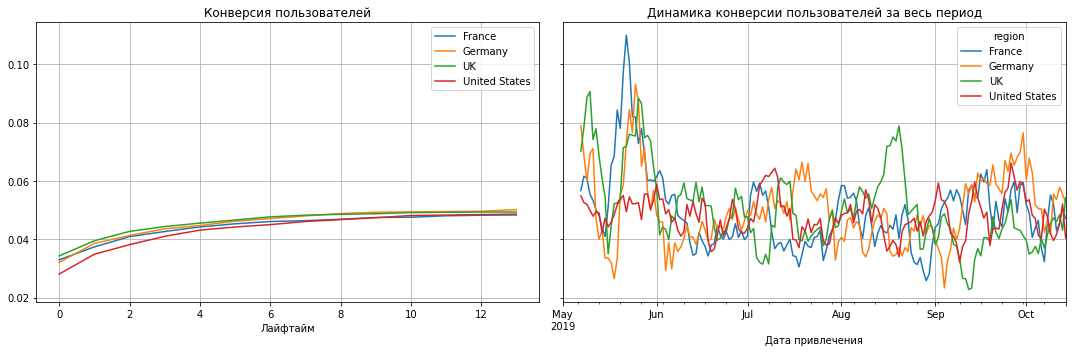

In [52]:
# Построим и изучим графики конверсии и удержания с разбивкой по странам
# исключив самые дорогие каналы TipTop и FaceBoom

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel not in ["TipTop", "FaceBoom"]'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Исключив самые дорогие каналы привлечения TipTop и FaceBoom видим, что Конверсия по всем странам на одинаковом уровне.


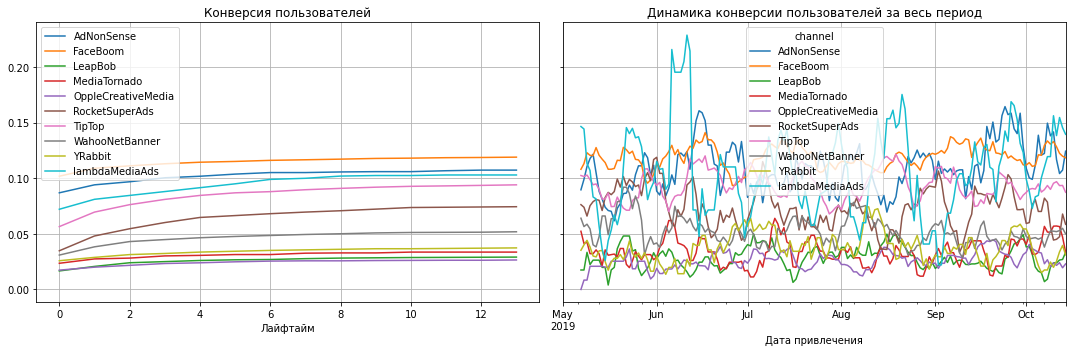

In [53]:
# Построим и изучим графики конверсии и удержания с разбивкой по рекламным каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Лидеры по показателям конверсии каналы: FaceBoom, AdNonSence, LambdaMediaAds, TipTop
- Самый низкий показатель у каналов: LeapBob, MediaTornado, Yrabbit, WahooNetBanner
- В июне можно выделить показатель канала LambdaMediaAds, у него очень высокий показатель за все время из всех каналов


**Ответьтим на вопросы:**
1. **Окупается ли реклама, направленная на привлечение пользователей в целом?**
- Реклама не окупается
2. **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**
- Негативное влияние оказывают каналы Tip Top и FaceBoom, регион USA и пользователи устройств Mac и IPhone
3. **Чем могут быть вызваны проблемы окупаемости?**
- Больше половины расходов пришлось на канал TipTop, самый высокий CAC, реклама не окупились на всем временном промежутке, низкий показателдь конверсии

### Напишите выводы

**Выделим причины неэффективности привлечения пользователей.**
1. Большая часть бюджета на рекламу было использовано на неэффективные каналы привлечения пользователей - Tip Top и FaceBoom. Несмотря на то что у канала FaceBoom высокий уровень конверсии, у него самая низкая динамика удержания платящих пользователей.
2. С каждым месяцем возрастала стоимость пользователи из USA, реклама здесь не окупилась. И динамика удержания платящих пользователей заметно ниже других регионов.
3. Несмотря на то что конверсия пользователей Mac и IPhone выше других, у них самый низкий показатель удержания платщих пользователей и высокая стоимость привлечения одного пользователя.
**Сформулируем рекомендации для отдела маркетинга.**
1. Необходимо уменьшить бюджет на привелечение канала Tip Top, т.к. реклама здесь не окупилась, но у канала высокий показатель LTV и уровень удержания платящих пользователей на среднем уровне.
2. Обратить внимание на канал FaceBoom, у него очень высокий уровень конверсии, но низкая динамика удержания. Необходимо проработать способы повышения уровня удержания платящих пользователей.
3. Увеличить бюджет канала lambdaMediaAds, реклама здесь окупается, показатель удержания платящих клиентов на среднем уровне и высокий показатель конверсии. 
4. Также обратить внимание на каналы с самый дешевым CAC. У этих каналов низкий показатель конверсии, но высокий уровень окупаемости и уровень удержания на среднем уровне.
- LeapBob 
- Yrabbit
- MediaTornado
4. Обратить внимание на пользователей PC - реклама для них окупилась, высокий уровень удержания клиентов. Но конверсия самая низкая. Есть предпосылки для развития. Исключив самые дорогие каналы привлечения TipTop и FaceBoom, пользователи IPhone показывают высокие показатели динамики удержания, особенно в летний период.
5. Есть большой потенциал работы с пользователями из USA, по исходным данным здесь самый высокий уровень конверсии, но низкий показатель удержания. Существенное влияние на показатели в USA оказывают каналы Tip Top и FaceBoom. Исключив эти источники у пользователей из USA самый высокий показатель окупаемости и удержания.
